In [17]:
# import dependencies
import numpy as np
import scipy.stats
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
#  Import and read the csv.
data_df = pd.read_csv("Resources/sample_data.csv")
data_df.head()

,Year,FIPS,C_S,month,cases,Pcincome,POPESTIMATE,MFratio,POPEST_MALE,POPEST_FEM,...,WA,BA,IA,AA,NA,TOM,NH,H,Cost,RUCC
0,2017,1001,"Autauga County,Alabama",1,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186712,2
1,2017,1001,"Autauga County,Alabama",2,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186577,2
2,2017,1001,"Autauga County,Alabama",3,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186397,2
3,2017,1001,"Autauga County,Alabama",4,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186839,2
4,2017,1001,"Autauga County,Alabama",5,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,187155,2


Data Cleaning

In [3]:
# Drop the null columns where all values are null
data_df = data_df.dropna(axis='columns', how='all')
data_df.head()

,Year,FIPS,C_S,month,cases,Pcincome,POPESTIMATE,MFratio,POPEST_MALE,POPEST_FEM,...,WA,BA,IA,AA,NA,TOM,NH,H,Cost,RUCC
0,2017,1001,"Autauga County,Alabama",1,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186712,2
1,2017,1001,"Autauga County,Alabama",2,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186577,2
2,2017,1001,"Autauga County,Alabama",3,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186397,2
3,2017,1001,"Autauga County,Alabama",4,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186839,2
4,2017,1001,"Autauga County,Alabama",5,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,187155,2


In [4]:
# Drop the null rows
data_df = data_df.dropna()
data_df.head()

,Year,FIPS,C_S,month,cases,Pcincome,POPESTIMATE,MFratio,POPEST_MALE,POPEST_FEM,...,WA,BA,IA,AA,NA,TOM,NH,H,Cost,RUCC
0,2017,1001,"Autauga County,Alabama",1,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186712,2
1,2017,1001,"Autauga County,Alabama",2,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186577,2
2,2017,1001,"Autauga County,Alabama",3,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186397,2
3,2017,1001,"Autauga County,Alabama",4,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186839,2
4,2017,1001,"Autauga County,Alabama",5,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,187155,2


In [5]:
#Using drop() to delete rows based on column value
data_df.drop(data_df[data_df['Year'] < 2019].index, inplace = True)
data_df.head()

,Year,FIPS,C_S,month,cases,Pcincome,POPESTIMATE,MFratio,POPEST_MALE,POPEST_FEM,...,WA,BA,IA,AA,NA,TOM,NH,H,Cost,RUCC
24,2019,1001,"Autauga County,Alabama",1,0,29819,55769,0.94378,27078,28691,...,42490,11252,266,668,58,1035,54116,1653,200156,2
25,2019,1001,"Autauga County,Alabama",2,0,29819,55769,0.94378,27078,28691,...,42490,11252,266,668,58,1035,54116,1653,200999,2
26,2019,1001,"Autauga County,Alabama",3,0,29819,55769,0.94378,27078,28691,...,42490,11252,266,668,58,1035,54116,1653,201698,2
27,2019,1001,"Autauga County,Alabama",4,0,29819,55769,0.94378,27078,28691,...,42490,11252,266,668,58,1035,54116,1653,202308,2
28,2019,1001,"Autauga County,Alabama",5,0,29819,55769,0.94378,27078,28691,...,42490,11252,266,668,58,1035,54116,1653,202854,2


In [ ]:
# Using drop() to delete rows based on column value
# this is redundant with the previous cell due to there being no Covid cases prior to 2019
#data_df.drop(data_df[data_df['cases'] < 1].index, inplace = True)

In [6]:
cases_cost_df = data_df[["cases","Cost"]]
cases_cost_df.head()

,cases,Cost
24,0,200156
25,0,200999
26,0,201698
27,0,202308
28,0,202854


In [7]:
# scale the cases and cost by 1000
cases_cost_df["Cost"] = cases_cost_df["Cost"].div(1000).round(2)
cases_cost_df["cases"] = cases_cost_df["cases"].div(1000).round(2)

C:\Users\dog\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dog\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


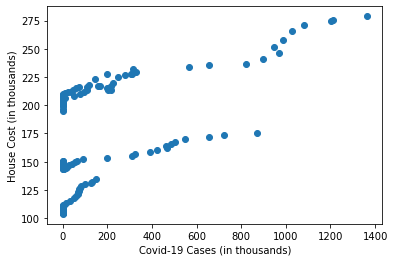

In [8]:
plt.scatter(cases_cost_df.cases, cases_cost_df.Cost)
plt.xlabel('Covid-19 Cases (in thousands)')
plt.ylabel('House Cost (in thousands)')
plt.show()

In [9]:
X = cases_cost_df.cases.values.reshape(-1, 1)

In [10]:
# we assign the target variable, or the Cost column, to y
y = cases_cost_df.Cost

In [11]:
# create an instance of the linear regression model
model = LinearRegression()

In [12]:
model.fit(X, y)

LinearRegression()

In [13]:
# the predict() method is used to generate predictions: 
# giventhe number of covid cases in a county in a month, the model will predict the cost:
y_pred = model.predict(X)

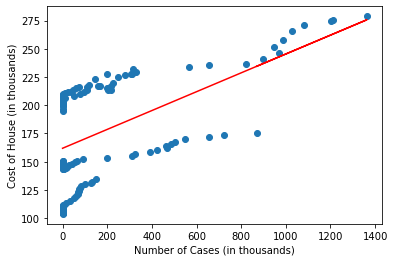

In [14]:
plt.scatter(X, y)
plt.xlabel('Number of Cases (in thousands)')
plt.ylabel('Cost of House (in thousands)')
plt.plot(X, y_pred, color='red')
plt.savefig("images/linear_regression.png") 
plt.show()

In [15]:
m = model.coef_.round(2)
b = model.intercept_.round(2)

f"The Linear Regression Model Equation is: y={m}x+{b}."

'The Linear Regression Model Equation is: y=[0.08]x+161.86.'

In [25]:
# find the correction coefficient r between cases and Cost
cases_cost_df.corr()

,cases,Cost
cases,1.000000,0.528353
Cost,0.528353,1.000000
